In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the data file
df = pd.read_csv("./Uber Request Data.csv")


In [39]:
#Inspect the structure and size of the data
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 210.8+ KB
None
(6745, 6)


In [3]:
# It can be inferred from the above information that there are a total of 6745 rows . 
# Null values are present in "Driver id" and "Drop timestamp".

In [4]:
# Look at unique values of "Pickup point" and "Status"
print(df['Pickup point'].unique())
print(df['Status'].unique())

['Airport' 'City']
['Trip Completed' 'Cancelled' 'No Cars Available']


In [5]:
# 'Airport' and 'City' are the two unique values for Pickup point
# 'Trip Completes', 'Cancelled', 'No Cars Available' are the unique values for Status
# So no data issues are there in these two columns

In [6]:
# Checking the presence of missing values

In [7]:
# Column wise missing values
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
#Find out the fraction of missing values
round(100*(df.isnull().sum()/len(df)), 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [9]:
# Driver id and drop time stamp has null values.
# Let us infer the data to see if we have to remove the rows containing null values

In [10]:
#Check for the rows where "Drop time" or "Driver id" is null
df_null=df.loc[pd.isnull(df['Driver id'])|pd.isnull(df['Drop timestamp'])]
print(df_null.head())
print(df_null.tail())

      Request id Pickup point  Driver id     Status Request timestamp  \
2831        2905         City        1.0  Cancelled  13-07-2016 06:08   
2832        4805         City        1.0  Cancelled  14-07-2016 17:07   
2833        5202      Airport        1.0  Cancelled  14-07-2016 20:51   
2834        5927         City        1.0  Cancelled  15-07-2016 10:12   
2835        2347      Airport        2.0  Cancelled  12-07-2016 19:14   

     Drop timestamp  
2831            NaN  
2832            NaN  
2833            NaN  
2834            NaN  
2835            NaN  
      Request id Pickup point  Driver id             Status Request timestamp  \
6740        6745         City        NaN  No Cars Available  15-07-2016 23:49   
6741        6752      Airport        NaN  No Cars Available  15-07-2016 23:50   
6742        6751         City        NaN  No Cars Available  15-07-2016 23:52   
6743        6754         City        NaN  No Cars Available  15-07-2016 23:54   
6744        6753      Ai

In [11]:
#It can be observed from the above that Driver Id is null when "No Cars Available".
#It can be observed from the above that Drop timestamp is null when "Cancelled" or "No Cars Available"
#This makes sense. Hence, deleting the data would remove a large chunk of it. So we will retain the data.

In [12]:
#Convert the time stamps to proper date time format.
# Set infer_datetime_format = True to allow the function to interpret the date format
# Set Dayfirst = True as the first value is day in the data

df['Request timestamp']=pd.to_datetime(df['Request timestamp'],infer_datetime_format=True, dayfirst=True)
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'],infer_datetime_format=True, dayfirst=True)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00


In [13]:
# Till now we have done:
# Data inspection(Inspecting the structure and size of data, looking at unique values)
# Data Cleaning (Finding out the fraction of missing values, Checking if removing rows with null values is necessary) 
# Data Manipulation (Converting the time stamps to suitable date-time format)

#Let us create plots to visualise data better

In [14]:
# Let us first segregate requests made on weekends and weekdays
# For that, we will add a column weekday which holds a value of 1 if weekend, 0 if weekday

df['Weekend']=df['Request timestamp'].apply(lambda x:1 if ((x.weekday==5) | (x.weekday==6)) else 0)
df['Weekend'].sum()


0

In [15]:
# It can be inferred that all the requests are made on a week day since sum of the values in 'Weekend' column is 0
# Hence, we drop the weekend column
df=df.drop(['Weekend'],axis=1)

In [16]:
# We now divide the request into time slots based on the hour the request is made
# For that, we will create two columns
# 1. 'Request_Hour' which extracts the hour from the 'Request Timestamp' 
# 2. 'Time_Slot' - The day is divided into 6 time slots based on the 'Request_Hour'

df["Request_Hour"]= df['Request timestamp'].apply(lambda x : x.hour)
df["Time_Slot"]=pd.cut(df.Request_Hour,[0,4,8,12,16,20,24],labels=['Midnight', 'Early Morning','Morning','Afternoon','Evening','Night'], include_lowest=True)

In [17]:
#calculate trip time
df['TripTime']=df['Drop timestamp'] - df['Request timestamp']
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Hour,Time_Slot,TripTime
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening,00:50:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,00:41:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,Early Morning,00:52:00


In [18]:
# We will now split the data frame into two data frames according to the pick up point (City or Airport)
df_city=df.loc[df['Pickup point'] =="City"]
df_airport=df.loc[df['Pickup point'] =="Airport"]


In [19]:
df_city.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Hour,Time_Slot,TripTime
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,00:41:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,Early Morning,00:52:00
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:00,2016-07-15 18:50:00,17,Evening,00:53:00
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,Early Morning,00:39:00
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12,Morning,00:27:00


In [20]:
df_airport.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Hour,Time_Slot,TripTime
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening,00:50:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,00:55:00
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:00,2016-07-13 22:28:00,21,Night,00:31:00
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:00,2016-07-14 07:13:00,6,Early Morning,00:58:00


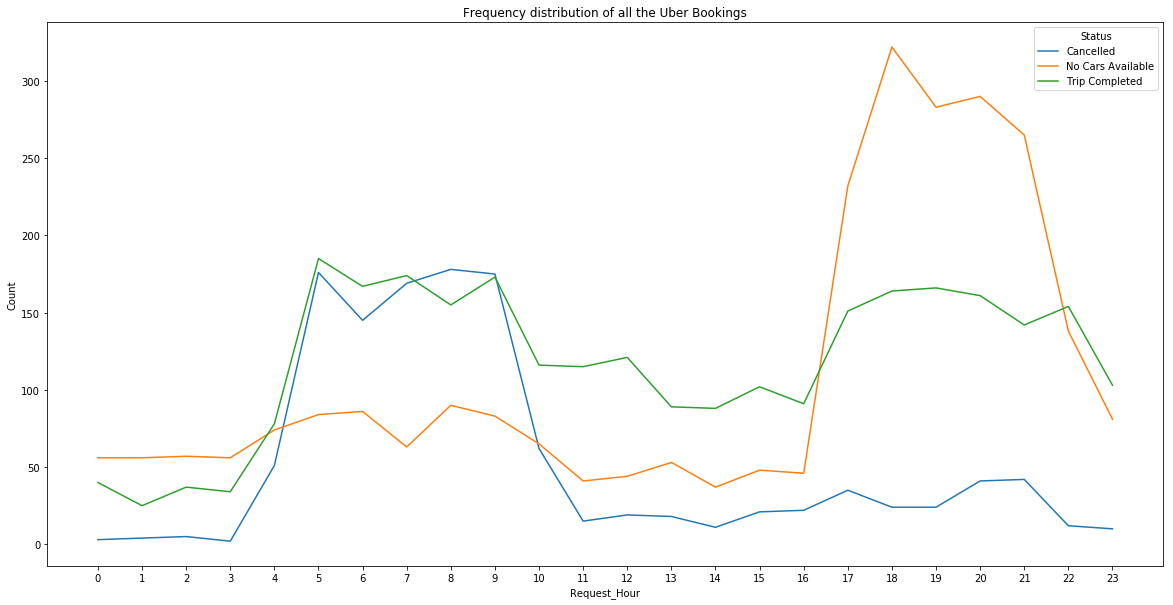

In [21]:
# We create a plot to show the various status on the basis of hours
fig, ax = plt.subplots(figsize=(20,10))
plt.ylabel("Count")
plt.title("Frequency distribution of all the Uber Bookings")
df.groupby(['Request_Hour','Status']).count()['Request id'].unstack().plot(ax=ax)
plt.xticks(np.arange(0, 24, step=1))
plt.show()

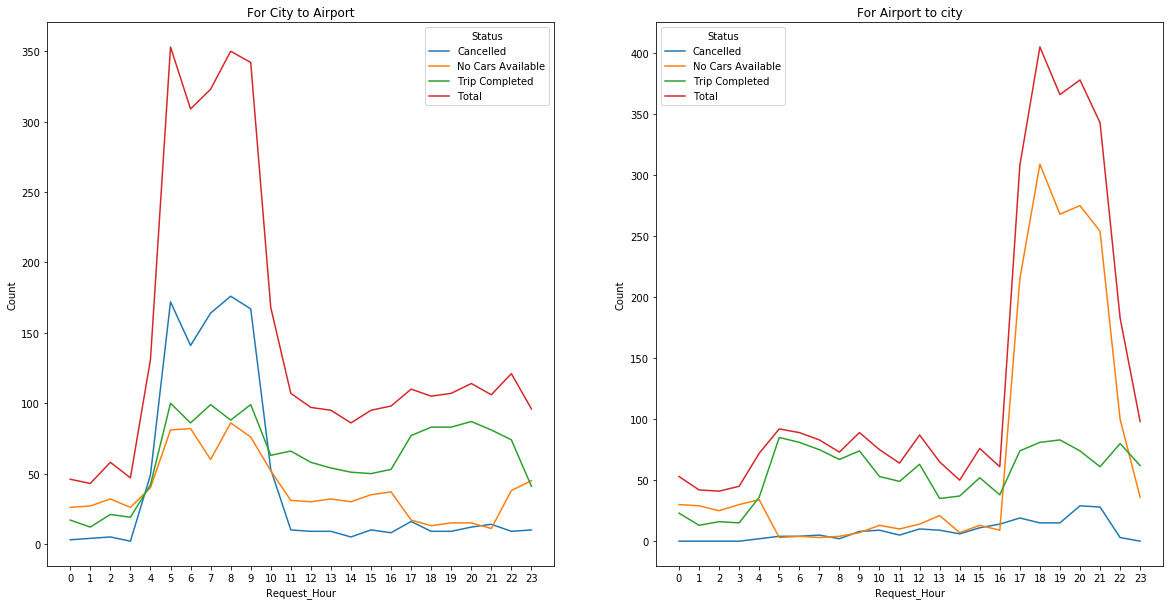

In [22]:
#Create two plots to show the Count of each status for 'city to Airport' and 'Airport to city' seperately for each hour. 
#Also create another column 'Total' which stores the total requests.

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plt.sca(ax1)
plt.title("For City to Airport")
plt.ylabel("Count")

#Create a dataframe containing the hr wise count of all the three Status. unstack() creates the column names
#as 'Cancelled', 'No cars available','Trips completed'
df_city1=df_city.groupby(['Request_Hour','Status']).count()['Request id'].unstack()

#If any of the Status not present, the value is taken as Nan. So replace all the Nan values with 0 to calculate the
#total count correctly
df_city1=df_city1.fillna(0)

#Add another column 'Total' which stores the total Requests
df_city1['Total']=df_city1['Cancelled']+df_city1['No Cars Available']+df_city1['Trip Completed']
df_city1.plot(ax=ax1)
plt.xticks(np.arange(0, 24, step=1))

#similarly do the same as above for traffic from airport to city
plt.sca(ax2)
plt.title("For Airport to city")
plt.ylabel("Count")
df_airport1=df_airport.groupby(['Request_Hour','Status']).count()['Request id'].unstack()
df_airport1=df_airport1.fillna(0)
df_airport1['Total']=df_airport1['Cancelled']+df_airport1['No Cars Available']+df_airport1['Trip Completed']
df_airport1.plot(ax=ax2)
plt.xticks(np.arange(0, 24, step=1))
plt.show()

In [23]:
# We do the same as above for plotting the counts of status on the basis on Timeslots

df_city.groupby(['Time_Slot','Status']).count()


Request id  Pickup point  Driver id  \
Time_Slot     Status                                                   
Midnight      Cancelled                  63            63         63   
              No Cars Available         151           151          0   
              Trip Completed            111           111        111   
Early Morning Cancelled                 653           653        653   
              No Cars Available         309           309          0   
              Trip Completed            373           373        373   
Morning       Cancelled                 239           239        239   
              No Cars Available         189           189          0   
              Trip Completed            286           286        286   
Afternoon     Cancelled                  32            32         32   
              No Cars Available         134           134          0   
              Trip Completed            208           208        208   
Evening       Cancelled                  46            46         46   
              No Cars Available          60            60          0   
              Trip Completed            330           330        330   
Night         Cancelled                  33            33         33   
              No Cars Available          94            94          0   
              Trip Completed            196           196        196   

                                 Request timestamp  Drop timestamp  \
Time_Slot     Status                                                 
Midnight      Cancelled                         63               0   
              No Cars Available                151               0   
              Trip Completed                   111             111   
Early Morning Cancelled                        653               0   
              No Cars Available                309               0   
              Trip Completed                   373             373   
Morning       Cancelled                        239               0   
              No Cars Available                189               0   
              Trip Completed                   286             286   
Afternoon     Cancelled                         32               0   
              No Cars Available                134               0   
              Trip Completed                   208             208   
Evening       Cancelled                         46               0   
              No Cars Available                 60               0   
              Trip Completed                   330             330   
Night         Cancelled                         33               0   
              No Cars Available                 94               0   
              Trip Completed                   196             196   

                                 Request_Hour  TripTime  
Time_Slot     Status                                     
Midnight      Cancelled                    63         0  
              No Cars Available           151         0  
              Trip Completed              111       111  
Early Morning Cancelled                   653         0  
              No Cars Available           309         0  
              Trip Completed              373       373  
Morning       Cancelled                   239         0  
              No Cars Available           189         0  
              Trip Completed              286       286  
Afternoon     Cancelled                    32         0  
              No Cars Available           134         0  
              Trip Completed              208       208  
Evening       Cancelled                    46         0  
              No Cars Available            60         0  
              Trip Completed              330       330  
Night         Cancelled                    33         0  
              No Cars Available            94         0  
              Trip Completed              196       196

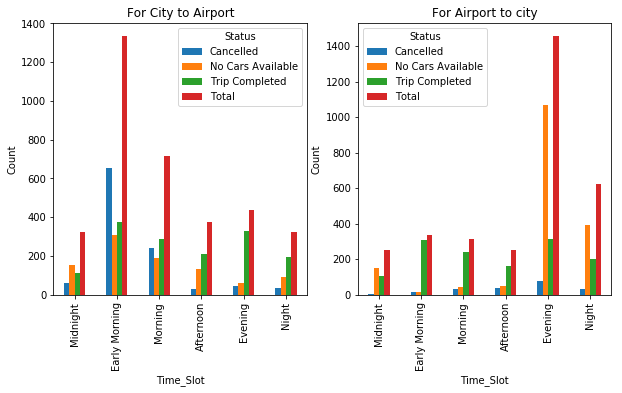

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.sca(ax1)
plt.title("For City to Airport")
plt.ylabel("Count")
df_city1=df_city.groupby(['Time_Slot','Status']).count()['Request id'].unstack()
df_city1=df_city1.fillna(0)
df_city1['Total']=df_city1['Cancelled']+df_city1['No Cars Available']+df_city1['Trip Completed']
df_city1.plot(ax=ax1, kind='bar')
plt.sca(ax2)
plt.title("For Airport to city")
plt.ylabel("Count")
df_airport1=df_airport.groupby(['Time_Slot','Status']).count()['Request id'].unstack()
df_airport1=df_airport1.fillna(0)
df_airport1['Total']=df_airport1['Cancelled']+df_airport1['No Cars Available']+df_airport1['Trip Completed']
df_airport1.plot(ax=ax2, kind='bar')
plt.show()

In [25]:
# CITY TO AIRPORT :It can be inferred from the above that in the interval 4am-8am (Early morning) there are most "Cancellations"
# AIRPORT TO CITY: It can be inferred from the above that in the interval 4pm-8pm (Evening) there are most "No Cars Available"

In [26]:
# Let us plot the percentage of completed trips to Request ratio

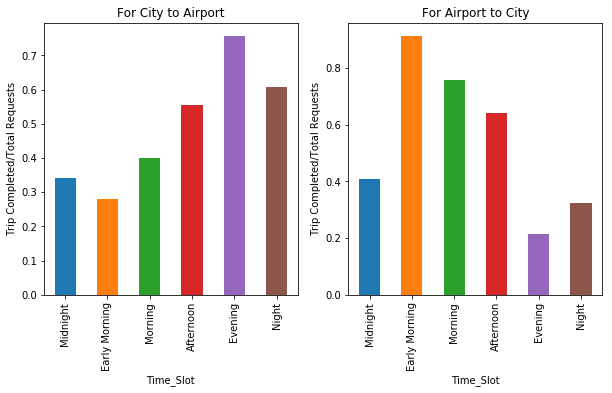

In [41]:
#Create another column 'ratio'
df_city1['ratio']=df_city1['Trip Completed']/df_city1['Total']
df_airport1['ratio']=df_airport1['Trip Completed']/df_airport1['Total']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.sca(ax1)
plt.title("For City to Airport")
plt.ylabel("Trip Completed/Total Requests")
df_city1['ratio'].plot(ax=ax1, kind='bar')
#plt.xticks(np.arange(0, 24, step=1))
plt.sca(ax2)
plt.title("For Airport to City")
plt.ylabel("Trip Completed/Total Requests")
df_airport1['ratio'].plot(ax=ax2, kind='bar')
#plt.xticks(np.arange(0, 24, step=1))
plt.show()

In [28]:
#It can be inferred from the above that the percentage of completed trips is:
#CITY TO AIRPORT : Least during Early morning , Highest during Evening
#AIRPORT TO CITY : Least during Evening, Highest during Early morning

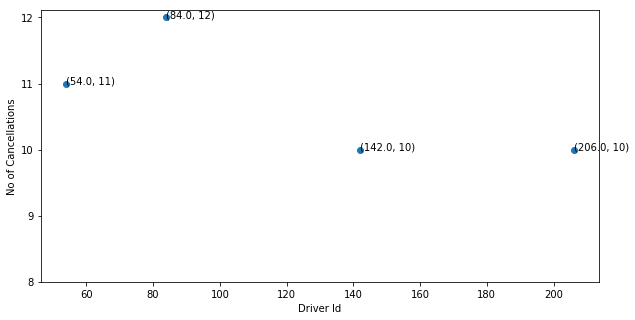

In [42]:
#Create a data frame df_cancel were we store the data containing "Status='Cancelled'"
df_cancel=df.loc[df.Status == 'Cancelled']
df_c=df_cancel.groupby(['Driver id'])
df_c=pd.DataFrame(df_c.size().reset_index(name="Count"))

# Creating scatter plot of drivers with greater than 10 cancellation requests
df_c1=df_c.loc[df_c.Count >=10]
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(df_c1['Driver id'], df_c1['Count'])
plt.xlabel('Driver Id')
plt.ylabel('No of Cancellations')
plt.yticks(np.arange(8, 13, step=1))
for xy in zip(df_c1['Driver id'], df_c1['Count']):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.show()

In [30]:
# It can be observed that four of the drivers have greater than 10 cancellations
# Hence, we will analyse when the cancellation had happened for one of the drivers

print(df.loc[df['Driver id'] == 54].sort_values(by='Request timestamp'))


      Request id Pickup point  Driver id          Status   Request timestamp  \
3032         216         City       54.0       Cancelled 2016-07-11 06:13:00   
522          234         City       54.0  Trip Completed 2016-07-11 06:27:00   
523          425      Airport       54.0  Trip Completed 2016-07-11 08:48:00   
524         1528         City       54.0  Trip Completed 2016-07-12 05:58:00   
525         1671      Airport       54.0  Trip Completed 2016-07-12 07:41:00   
3033        1898         City       54.0       Cancelled 2016-07-12 10:27:00   
3034        2077         City       54.0       Cancelled 2016-07-12 15:40:00   
526         2223         City       54.0  Trip Completed 2016-07-12 18:07:00   
3035        2486      Airport       54.0       Cancelled 2016-07-12 20:50:00   
3036        2809         City       54.0       Cancelled 2016-07-13 05:05:00   
3037        2900         City       54.0       Cancelled 2016-07-13 06:01:00   
3038        3022         City       54.0

In [31]:
#It can be observed that most of the cancellations happened during early morning and odd hours

In [48]:
#Gap tells the difference between supply and demand.

df_city1['Gap']=df_city1['Total'] - df_city1['Trip Completed']
df_city1.head(10)

Status,Cancelled,No Cars Available,Trip Completed,Total,ratio,Gap
Time_Slot,,,,,,
Midnight,63,151,111,325,0.341538,214
Early Morning,653,309,373,1335,0.279401,962
Morning,239,189,286,714,0.400560,428
Afternoon,32,134,208,374,0.556150,166
Evening,46,60,330,436,0.756881,106
Night,33,94,196,323,0.606811,127


In [49]:
#Gap when pick up point is airport
df_airport1['Gap']=df_airport1['Total'] - df_airport1['Trip Completed']
df_airport1.head(10)

Status,Cancelled,No Cars Available,Trip Completed,Total,ratio,Gap
Time_Slot,,,,,,
Midnight,2,148,103,253,0.407115,150
Early Morning,15,14,308,337,0.913947,29
Morning,32,44,239,315,0.758730,76
Afternoon,40,50,162,252,0.642857,90
Evening,78,1067,312,1457,0.214139,1145
Night,31,390,203,624,0.325321,421


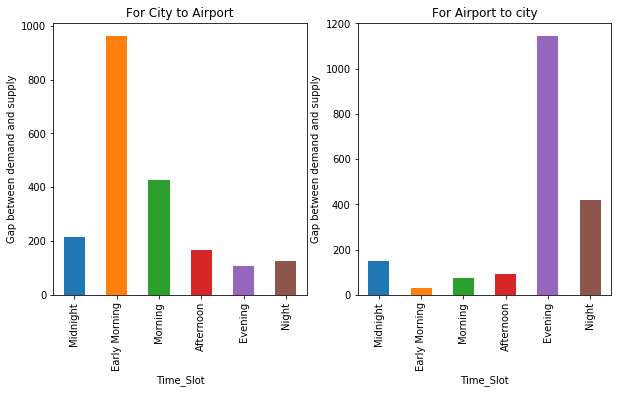

In [51]:
# Bar chart for the demand and supply in each status

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.sca(ax1)
plt.title("For City to Airport")
plt.ylabel("Gap between demand and supply")
df_city1['Gap'].plot(ax=ax1,kind='bar')
#plt.xticks(np.arange(0, 24, step=1))
plt.sca(ax2)
plt.title("For Airport to city")
plt.ylabel("Gap between demand and supply")
df_airport1['Gap'].plot(ax=ax2,kind='bar')
#plt.xticks(np.arange(0, 24, step=1))
plt.show()

In [35]:
# CITY TO AIRPORT: It can be inferred from the above graph that the highest graph is in the "Early Morning" Time Slot
# AIRPORT TO CITY: It can be inferred from the above graph that the highest graph is in the "Evening" Time Slot